In [1]:
import pandas as pd

In [2]:
#Step 1: Load the Data

In [6]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV into a DataFrame
customers = pd.read_csv(list(uploaded.keys())[0])

# Display the DataFrame
customers.head()


Saving Customers.csv to Customers (1).csv
Saving Products.csv to Products (1).csv
Saving Transactions.csv to Transactions (1).csv


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products = pd.read_csv('Products.csv')

In [8]:
transactions = pd.read_csv('Transactions.csv')

In [9]:
#Step 2: Clean the Data

In [10]:
# 1. Check for missing values:

In [11]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [12]:
# 2. Handle missing values

In [13]:
customers.dropna()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [14]:
products.dropna()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [15]:
transactions.dropna()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [16]:
# 3. Convert date columns to datetime:

In [17]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [18]:
# Step 3: Merge the Data for EDA

In [19]:
# 1. Merge all three DataFrames:

In [20]:
df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [21]:
# Step 4: Perform EDA

In [22]:
df.describe()

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


In [23]:
# Visualization:

In [24]:
# 1. Distribution of transactions by customer regions:

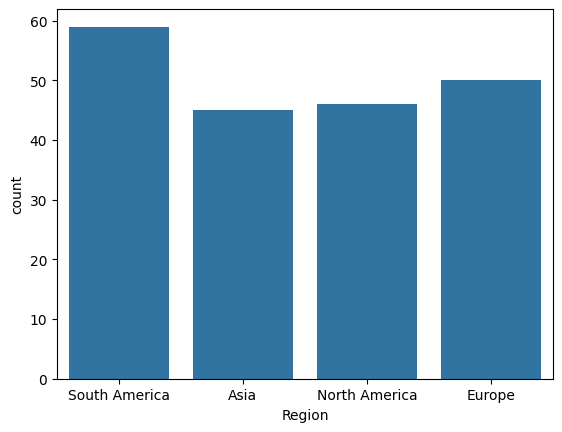

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=customers, x='Region')
plt.show()


Distribution of product categories and transaction volume:

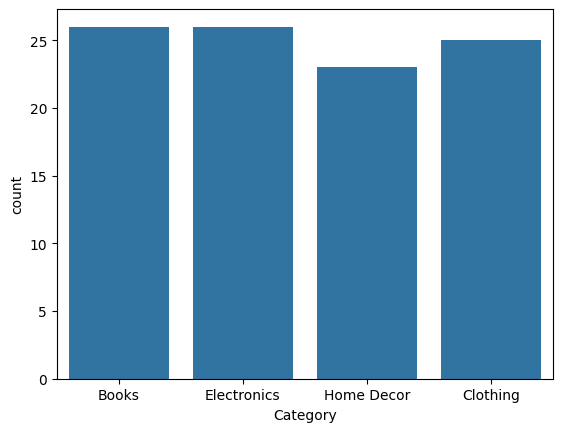

In [26]:
sns.countplot(data=products, x='Category')
plt.show()

Monthly trends of transactions:

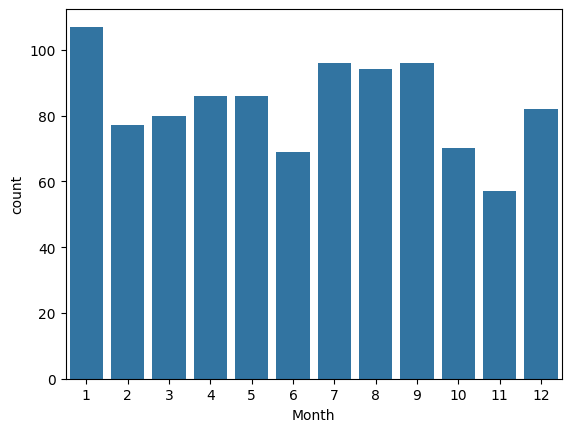

In [27]:
df['Month'] = df['TransactionDate'].dt.month
sns.countplot(data=df, x='Month')
plt.show()